In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams["font.size"] = 14
import warnings
warnings.simplefilter("ignore")
import datetime as dt
from scipy import io
from joblib import load

data = pd.read_csv("../data/classes_and_errors.csv")
data["timestamp"] = data["timestamp"].apply(pd.to_datetime)
data.head()

,class,timestamp,org,repo,size_KB,size,pull_count,errors
0,COGSCI 1,2019-09-11 19:00:00,ds-modules,COGSCI-1,185.0,145.0,4,501.25
1,COGSCI 1,2019-09-11 20:00:00,ds-modules,COGSCI-1,26153.0,145.0,7,0.00
2,COGSCI 1,2019-09-11 22:00:00,ds-modules,COGSCI-1,185.0,145.0,5,0.00
3,COGSCI 1,2019-09-11 23:00:00,ds-modules,COGSCI-1,185.0,145.0,46,0.00
4,COGSCI 1,2019-09-12 00:00:00,ds-modules,COGSCI-1,185.0,145.0,2,0.00


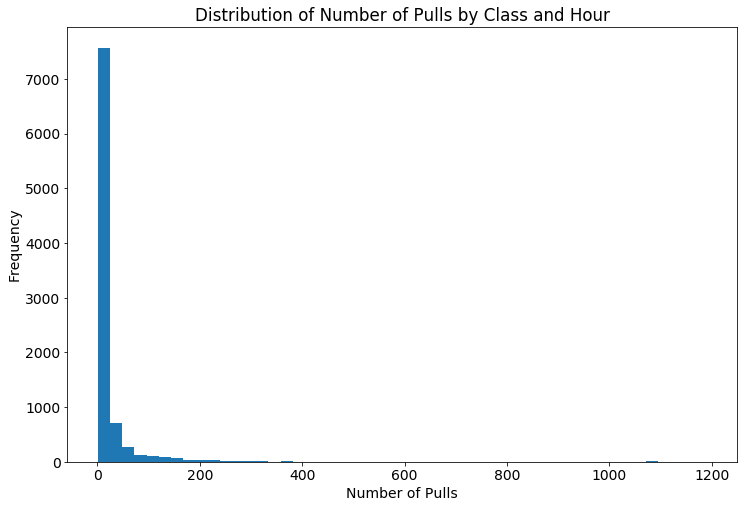

In [23]:
data["pull_count"].plot.hist(bins=50)
plt.xlabel("Number of Pulls")
plt.title("Distribution of Number of Pulls by Class and Hour");

In [52]:
data["pulls_relative"] = data["pull_count"] / data["size"]
by_pulls = data.sort_values("pulls_relative", ascending=False)
by_pulls[by_pulls["errors"] > 0].head()

,class,timestamp,org,repo,size_KB,size,pull_count,errors,dow,hour,pulls_relative
5625,ESPM/IB C105,2019-10-07 19:00:00,ds-modules,IB-ESPM-105,31983.0,17.0,67,338.75,0,19,3.941176
8705,XRHETOR R1A,2019-10-07 19:00:00,ds-modules,XRHETOR-R1A,31983.0,17.0,67,338.75,0,19,3.941176
5569,ESPM/IB C105,2019-10-04 19:00:00,ds-modules,IB-ESPM-105,980.0,17.0,61,657.50,4,19,3.588235
8649,XRHETOR R1A,2019-10-04 19:00:00,ds-modules,XRHETOR-R1A,980.0,17.0,61,657.50,4,19,3.588235
5645,ESPM/IB C105,2019-10-08 19:00:00,ds-modules,IB-ESPM-105,980.0,17.0,59,302.50,1,19,3.470588


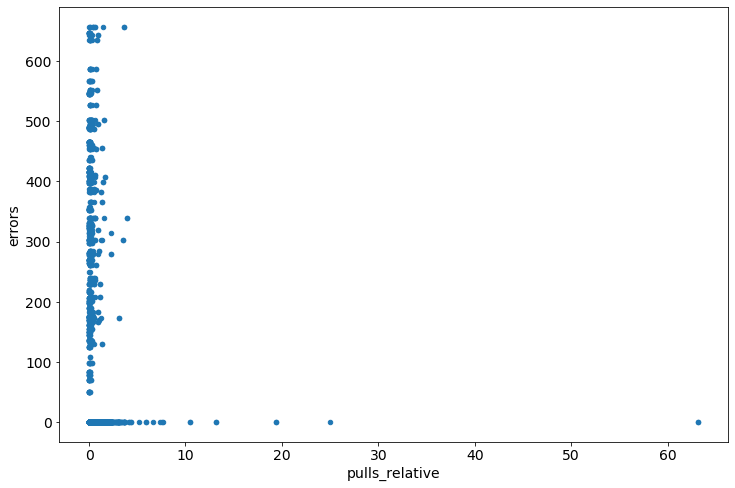

In [64]:
by_pulls.plot.scatter("pulls_relative", "errors")